In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('movies.csv')
df.head()

id                              title  \
0  615656                  Meg 2: The Trench   
1  758323                The Pope's Exorcist   
2  667538   Transformers: Rise of the Beasts   
3  640146  Ant-Man and the Wasp: Quantumania   
4  677179                          Creed III   

                             genres original_language  \
0     Action-Science Fiction-Horror                en   
1           Horror-Mystery-Thriller                en   
2  Action-Adventure-Science Fiction                en   
3  Action-Adventure-Science Fiction                en   
4                      Drama-Action                en   

                                            overview  popularity  \
0  An exploratory dive into the deepest depths of...    8763.998   
1  Father Gabriele Amorth Chief Exorcist of the V...    5953.227   
2  When a new threat capable of destroying the en...    5409.104   
3  Super-Hero partners Scott Lang and Hope van Dy...    4425.387   
4  After dominating the boxing world Adonis Creed...    3994.342   

                                production_companies release_date  \
0  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   
1  Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...   2023-04-05   
2  Skydance-Paramount-di Bonaventura Pictures-Bay...   2023-06-06   
3             Marvel Studios-Kevin Feige Productions   2023-02-15   
4  Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...   2023-03-01   

        budget      revenue  runtime    status  \
0  129000000.0  352056482.0    116.0  Released   
1   18000000.0   65675816.0    103.0  Released   
2  200000000.0  407045464.0    127.0  Released   
3  200000000.0  475766228.0    125.0  Released   
4   75000000.0  269000000.0    116.0  Released   

                                             tagline  vote_average  \
0                                  Back for seconds.         7.079   
1  Inspired by the actual files of Father Gabriel...         7.433   
2                                     Unite or fall.         7.340   
3            Witness the beginning of a new dynasty.         6.507   
4                      You can't run from your past.         7.262   

   vote_count                                            credits  \
0      1365.0  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   
1       545.0  Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...   
2      1007.0  Anthony Ramos-Dominique Fishback-Luna Lauren V...   
3      2811.0  Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...   
4      1129.0  Michael B. Jordan-Tessa Thompson-Jonathan Majo...   

                                            keywords  \
0                based on novel or book-sequel-kaiju   
1  spain-rome italy-vatican-pope-pig-possession-c...   
2  peru-alien-end of the world-based on cartoon-b...   
3  hero-ant-sequel-superhero-based on comic-famil...   
4  philadelphia pennsylvania-husband wife relatio...   

                        poster_path                     backdrop_path  \
0  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   
1  /9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg  /hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg   
2  /gPbM0MK8CP8A174rmUwGsADNYKD.jpg  /woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg   
3  /qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg  /m8JTwHFwX7I7JY5fPe4SjqejWag.jpg   
4  /cvsXj3I9Q2iyyIo95AecSd1tad7.jpg  /5i6SjyDbDWqyun8klUuCxrlFbyw.jpg   

                                     recommendations  
0  1006462-298618-569094-1061181-346698-1076487-6...  
1  713704-296271-502356-1076605-1084225-1008005-9...  
2  496450-569094-298618-385687-877100-598331-4628...  
3  823999-676841-868759-734048-267805-965839-1033...  
4  965839-267805-943822-842942-1035806-823999-107...

<h2>Feature Extraction</h2>

In [3]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
df['overview']= df['overview'].fillna('')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/klebervasconcelos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/klebervasconcelos/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/klebervasconcelos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
sample_df = df.sample(n=5)
sample_df.head()


id                            title       genres  \
502192  366439  Frank Sinatra - Best of Moments          NaN   
382629  939693                 The Wedding Song        Drama   
383547  697916          Concrete, Steel & Paint          NaN   
404837  948633               Isotopes in Action  Documentary   
543453  412318          Der eingebildete Kranke          NaN   

       original_language                                           overview  \
502192                pt                                                      
382629                en  A beautiful con artist marries Hayes Hallan th...   
383547                en  This film tells the complex story of men in pr...   
404837                en  A BAFTA award nominated documentary exploring ...   
543453                en    Short romantic comedy directed by Douglas Sirk.   

        popularity           production_companies release_date  budget  \
502192         0.6                            NaN   2016-02-18     0.0   
382629         0.6  Cinema Corporation of America   1925-11-29     0.0   
383547         0.6                            NaN   2009-12-31     0.0   
404837         0.6                      ONF | NFB   1967-01-01     0.0   
543453         0.6                            NaN   1935-01-01     0.0   

        revenue  runtime    status  \
502192      0.0      0.0  Released   
382629      0.0     70.0  Released   
383547      0.0     55.0  Released   
404837      0.0      0.0  Released   
543453      0.0     36.0  Released   

                                                  tagline  vote_average  \
502192                                                NaN           0.0   
382629  THE TRUSTED PAL of Crooks, she Aimed to Aid th...           0.0   
383547                                                NaN           0.0   
404837                                                NaN           0.0   
543453                                                NaN           0.0   

        vote_count                                            credits  \
502192         0.0                                                NaN   
382629         0.0  Leatrice Joy-Robert Ames-Charles K. Gerrard-Ru...   
383547         0.0                                                NaN   
404837         0.0                                                NaN   
543453         0.0  Heinz Förster-Ludwig-Baby Gray-Fritz Odemar-Cl...   

       keywords                       poster_path  \
502192      NaN                               NaN   
382629      NaN  /7NkYCqnt8FAxiTVsVsoS4a1rob9.jpg   
383547      NaN  /hoCJuUGWA5Z4cTzAwGQqibqDGvP.jpg   
404837      NaN                               NaN   
543453      NaN                               NaN   

                           backdrop_path recommendations  
502192                               NaN             NaN  
382629  /vQ2jxbf96XBy5A3b9XloXvl3aQe.jpg             NaN  
383547                               NaN             NaN  
404837                               NaN             NaN  
543453                               NaN             NaN

In [5]:
sample_df['overview']=sample_df['overview'].str.lower().apply(word_tokenize).apply(nltk.tag.pos_tag) # Applying part of speech tags.
sample_df.head()

id                            title       genres  \
502192  366439  Frank Sinatra - Best of Moments          NaN   
382629  939693                 The Wedding Song        Drama   
383547  697916          Concrete, Steel & Paint          NaN   
404837  948633               Isotopes in Action  Documentary   
543453  412318          Der eingebildete Kranke          NaN   

       original_language                                           overview  \
502192                pt                                                 []   
382629                en  [(a, DT), (beautiful, JJ), (con, NN), (artist,...   
383547                en  [(this, DT), (film, NN), (tells, VBZ), (the, D...   
404837                en  [(a, DT), (bafta, JJ), (award, NN), (nominated...   
543453                en  [(short, JJ), (romantic, JJ), (comedy, NN), (d...   

        popularity           production_companies release_date  budget  \
502192         0.6                            NaN   2016-02-18     0.0   
382629         0.6  Cinema Corporation of America   1925-11-29     0.0   
383547         0.6                            NaN   2009-12-31     0.0   
404837         0.6                      ONF | NFB   1967-01-01     0.0   
543453         0.6                            NaN   1935-01-01     0.0   

        revenue  runtime    status  \
502192      0.0      0.0  Released   
382629      0.0     70.0  Released   
383547      0.0     55.0  Released   
404837      0.0      0.0  Released   
543453      0.0     36.0  Released   

                                                  tagline  vote_average  \
502192                                                NaN           0.0   
382629  THE TRUSTED PAL of Crooks, she Aimed to Aid th...           0.0   
383547                                                NaN           0.0   
404837                                                NaN           0.0   
543453                                                NaN           0.0   

        vote_count                                            credits  \
502192         0.0                                                NaN   
382629         0.0  Leatrice Joy-Robert Ames-Charles K. Gerrard-Ru...   
383547         0.0                                                NaN   
404837         0.0                                                NaN   
543453         0.0  Heinz Förster-Ludwig-Baby Gray-Fritz Odemar-Cl...   

       keywords                       poster_path  \
502192      NaN                               NaN   
382629      NaN  /7NkYCqnt8FAxiTVsVsoS4a1rob9.jpg   
383547      NaN  /hoCJuUGWA5Z4cTzAwGQqibqDGvP.jpg   
404837      NaN                               NaN   
543453      NaN                               NaN   

                           backdrop_path recommendations  
502192                               NaN             NaN  
382629  /vQ2jxbf96XBy5A3b9XloXvl3aQe.jpg             NaN  
383547                               NaN             NaN  
404837                               NaN             NaN  
543453                               NaN             NaN

In [6]:
sample_df['overview'].head()

502192                                                   []
382629    [(a, DT), (beautiful, JJ), (con, NN), (artist,...
383547    [(this, DT), (film, NN), (tells, VBZ), (the, D...
404837    [(a, DT), (bafta, JJ), (award, NN), (nominated...
543453    [(short, JJ), (romantic, JJ), (comedy, NN), (d...
Name: overview, dtype: object

In [7]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
sample_df['overview']= sample_df['overview'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
sample_df['overview'].head()

502192                                                   []
382629    [(a, n), (beautiful, a), (con, n), (artist, n)...
383547    [(this, n), (film, n), (tells, v), (the, n), (...
404837    [(a, n), (bafta, a), (award, n), (nominated, v...
543453    [(short, a), (romantic, a), (comedy, n), (dire...
Name: overview, dtype: object

In [8]:
# Applying word lemmatizer.

wnl = WordNetLemmatizer()

sample_df['overview']= sample_df['overview'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

sample_df['overview']= sample_df['overview'].apply(lambda x: ' '.join(x))

sample_df.head()


id                            title       genres  \
502192  366439  Frank Sinatra - Best of Moments          NaN   
382629  939693                 The Wedding Song        Drama   
383547  697916          Concrete, Steel & Paint          NaN   
404837  948633               Isotopes in Action  Documentary   
543453  412318          Der eingebildete Kranke          NaN   

       original_language                                           overview  \
502192                pt                                                      
382629                en  a beautiful con artist marries hay hallan the ...   
383547                en  this film tell the complex story of men in pri...   
404837                en  a bafta award nominate documentary explore wha...   
543453                en     short romantic comedy direct by douglas sirk .   

        popularity           production_companies release_date  budget  \
502192         0.6                            NaN   2016-02-18     0.0   
382629         0.6  Cinema Corporation of America   1925-11-29     0.0   
383547         0.6                            NaN   2009-12-31     0.0   
404837         0.6                      ONF | NFB   1967-01-01     0.0   
543453         0.6                            NaN   1935-01-01     0.0   

        revenue  runtime    status  \
502192      0.0      0.0  Released   
382629      0.0     70.0  Released   
383547      0.0     55.0  Released   
404837      0.0      0.0  Released   
543453      0.0     36.0  Released   

                                                  tagline  vote_average  \
502192                                                NaN           0.0   
382629  THE TRUSTED PAL of Crooks, she Aimed to Aid th...           0.0   
383547                                                NaN           0.0   
404837                                                NaN           0.0   
543453                                                NaN           0.0   

        vote_count                                            credits  \
502192         0.0                                                NaN   
382629         0.0  Leatrice Joy-Robert Ames-Charles K. Gerrard-Ru...   
383547         0.0                                                NaN   
404837         0.0                                                NaN   
543453         0.0  Heinz Förster-Ludwig-Baby Gray-Fritz Odemar-Cl...   

       keywords                       poster_path  \
502192      NaN                               NaN   
382629      NaN  /7NkYCqnt8FAxiTVsVsoS4a1rob9.jpg   
383547      NaN  /hoCJuUGWA5Z4cTzAwGQqibqDGvP.jpg   
404837      NaN                               NaN   
543453      NaN                               NaN   

                           backdrop_path recommendations  
502192                               NaN             NaN  
382629  /vQ2jxbf96XBy5A3b9XloXvl3aQe.jpg             NaN  
383547                               NaN             NaN  
404837                               NaN             NaN  
543453                               NaN             NaN

In [9]:
def lammatization():
    import nltk
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    from nltk.corpus import wordnet, stopwords
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    df['overview']= df['overview'].fillna('')

    # Tokenizing the tweet base texts (splitting the text into individual words)
    # and applying part of speech tags to each word

    df['overview']=df['overview'].str.lower().apply(word_tokenize).apply(nltk.tag.pos_tag) 


    # Converting part of speeches to wordnet format.

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN


    df['overview']= df['overview'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

    # Applying word lemmatizer.

    wnl = WordNetLemmatizer()

    df['overview']= df['overview'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])


    df['overview']= df['overview'].apply(lambda x: ' '.join(x))

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

df.drop_duplicates(inplace=True, ignore_index=True)
#df = df.groupby('title').first().reset_index()
df.fillna(value={i: ' ' for i in ['overview', 'genres', 'keywords', 'credits']}, inplace=True)

# lambda func for str split join
strOp= lambda x: ' '.join(x.split('-'))

df.overview = df.overview + df.keywords.apply(strOp) + df.genres.apply(strOp) + df.credits.apply(lambda x: ' '.join(x.replace(' ', '').split('-')[:3]))

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['overview'])

display(pd.DataFrame(
    tfidf_matrix[:10, 7000:7070].toarray(),
    columns= tfidf.get_feature_names_out()[7000:7070],
    index = df.title[:10]).round())

print(tfidf_matrix.shape)

aadimoolam  aadisaikumar  aadisesh  \
title                                                                     
Meg 2: The Trench                           0.0           0.0       0.0   
The Pope's Exorcist                         0.0           0.0       0.0   
Transformers: Rise of the Beasts            0.0           0.0       0.0   
Ant-Man and the Wasp: Quantumania           0.0           0.0       0.0   
Creed III                                   0.0           0.0       0.0   
Fast X                                      0.0           0.0       0.0   
Insidious: The Red Door                     0.0           0.0       0.0   
Plane                                       0.0           0.0       0.0   
Spider-Man: Across the Spider-Verse         0.0           0.0       0.0   
The Eighth Clause                           0.0           0.0       0.0   

                                     aadisingh  aaditha  aaditiagarwal  \
title                                                                    
Meg 2: The Trench                          0.0      0.0            0.0   
The Pope's Exorcist                        0.0      0.0            0.0   
Transformers: Rise of the Beasts           0.0      0.0            0.0   
Ant-Man and the Wasp: Quantumania          0.0      0.0            0.0   
Creed III                                  0.0      0.0            0.0   
Fast X                                     0.0      0.0            0.0   
Insidious: The Red Door                    0.0      0.0            0.0   
Plane                                      0.0      0.0            0.0   
Spider-Man: Across the Spider-Verse        0.0      0.0            0.0   
The Eighth Clause                          0.0      0.0            0.0   

                                     aaditipohankar  aaditya  aadityapandey  \
title                                                                         
Meg 2: The Trench                               0.0      0.0            0.0   
The Pope's Exorcist                             0.0      0.0            0.0   
Transformers: Rise of the Beasts                0.0      0.0            0.0   
Ant-Man and the Wasp: Quantumania               0.0      0.0            0.0   
Creed III                                       0.0      0.0            0.0   
Fast X                                          0.0      0.0            0.0   
Insidious: The Red Door                         0.0      0.0            0.0   
Plane                                           0.0      0.0            0.0   
Spider-Man: Across the Spider-Verse             0.0      0.0            0.0   
The Eighth Clause                               0.0      0.0            0.0   

                                     aadityasingh  ...  aaidung  aain  aaines  \
title                                              ...                          
Meg 2: The Trench                             0.0  ...      0.0   0.0     0.0   
The Pope's Exorcist                           0.0  ...      0.0   0.0     0.0   
Transformers: Rise of the Beasts              0.0  ...      0.0   0.0     0.0   
Ant-Man and the Wasp: Quantumania             0.0  ...      0.0   0.0     0.0   
Creed III                                     0.0  ...      0.0   0.0     0.0   
Fast X                                        0.0  ...      0.0   0.0     0.0   
Insidious: The Red Door                       0.0  ...      0.0   0.0     0.0   
Plane                                         0.0  ...      0.0   0.0     0.0   
Spider-Man: Across the Spider-Verse           0.0  ...      0.0   0.0     0.0   
The Eighth Clause                             0.0  ...      0.0   0.0     0.0   

                                     aaj  aaja  aajoba  aaju  aajupeter  \
title                                                                     
Meg 2: The Trench                    0.0   0.0     0.0   0.0        0.0   
The Pope's Exorcist                  0.0   0.0     0.0   0.0        0.0   
Transformers: Rise of the

(722530, 962479)


<h3>Recommender Function<h3>

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import skimage.io as io

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title][0]
    # show given movie poster
    try:
        a = io.imread(f'https://image.tmdb.org/t/p/w500/{df.loc[idx, "poster_path"]}')
        plt.imshow(a)
        plt.axis('off')
        plt.title(title)
        plt.show()
    except:pass
    
    print('Recommendations\n')


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(
        cosine_similarity(
            tfidf_matrix,
            tfidf_matrix[idx])))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    result = df.iloc[movie_indices]
    
    # show reco. movie posters
    fig, ax = plt.subplots(3, 3, figsize=(15,20))
    ax=ax.flatten()
    for i, j in enumerate(result.poster_path):
        try:
            ax[i].axis('off')
            ax[i].set_title(result.iloc[i].title,fontsize=22)
            a = io.imread(f'https://image.tmdb.org/t/p/w500/{j}')
            ax[i].imshow(a)          
        except: pass
    fig.tight_layout()
    fig.show()

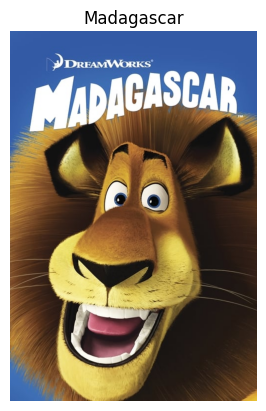

Recommendations



/var/folders/yq/_khqzr215rb86fp_wn6l744m0000gn/T/ipykernel_3326/134117371.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


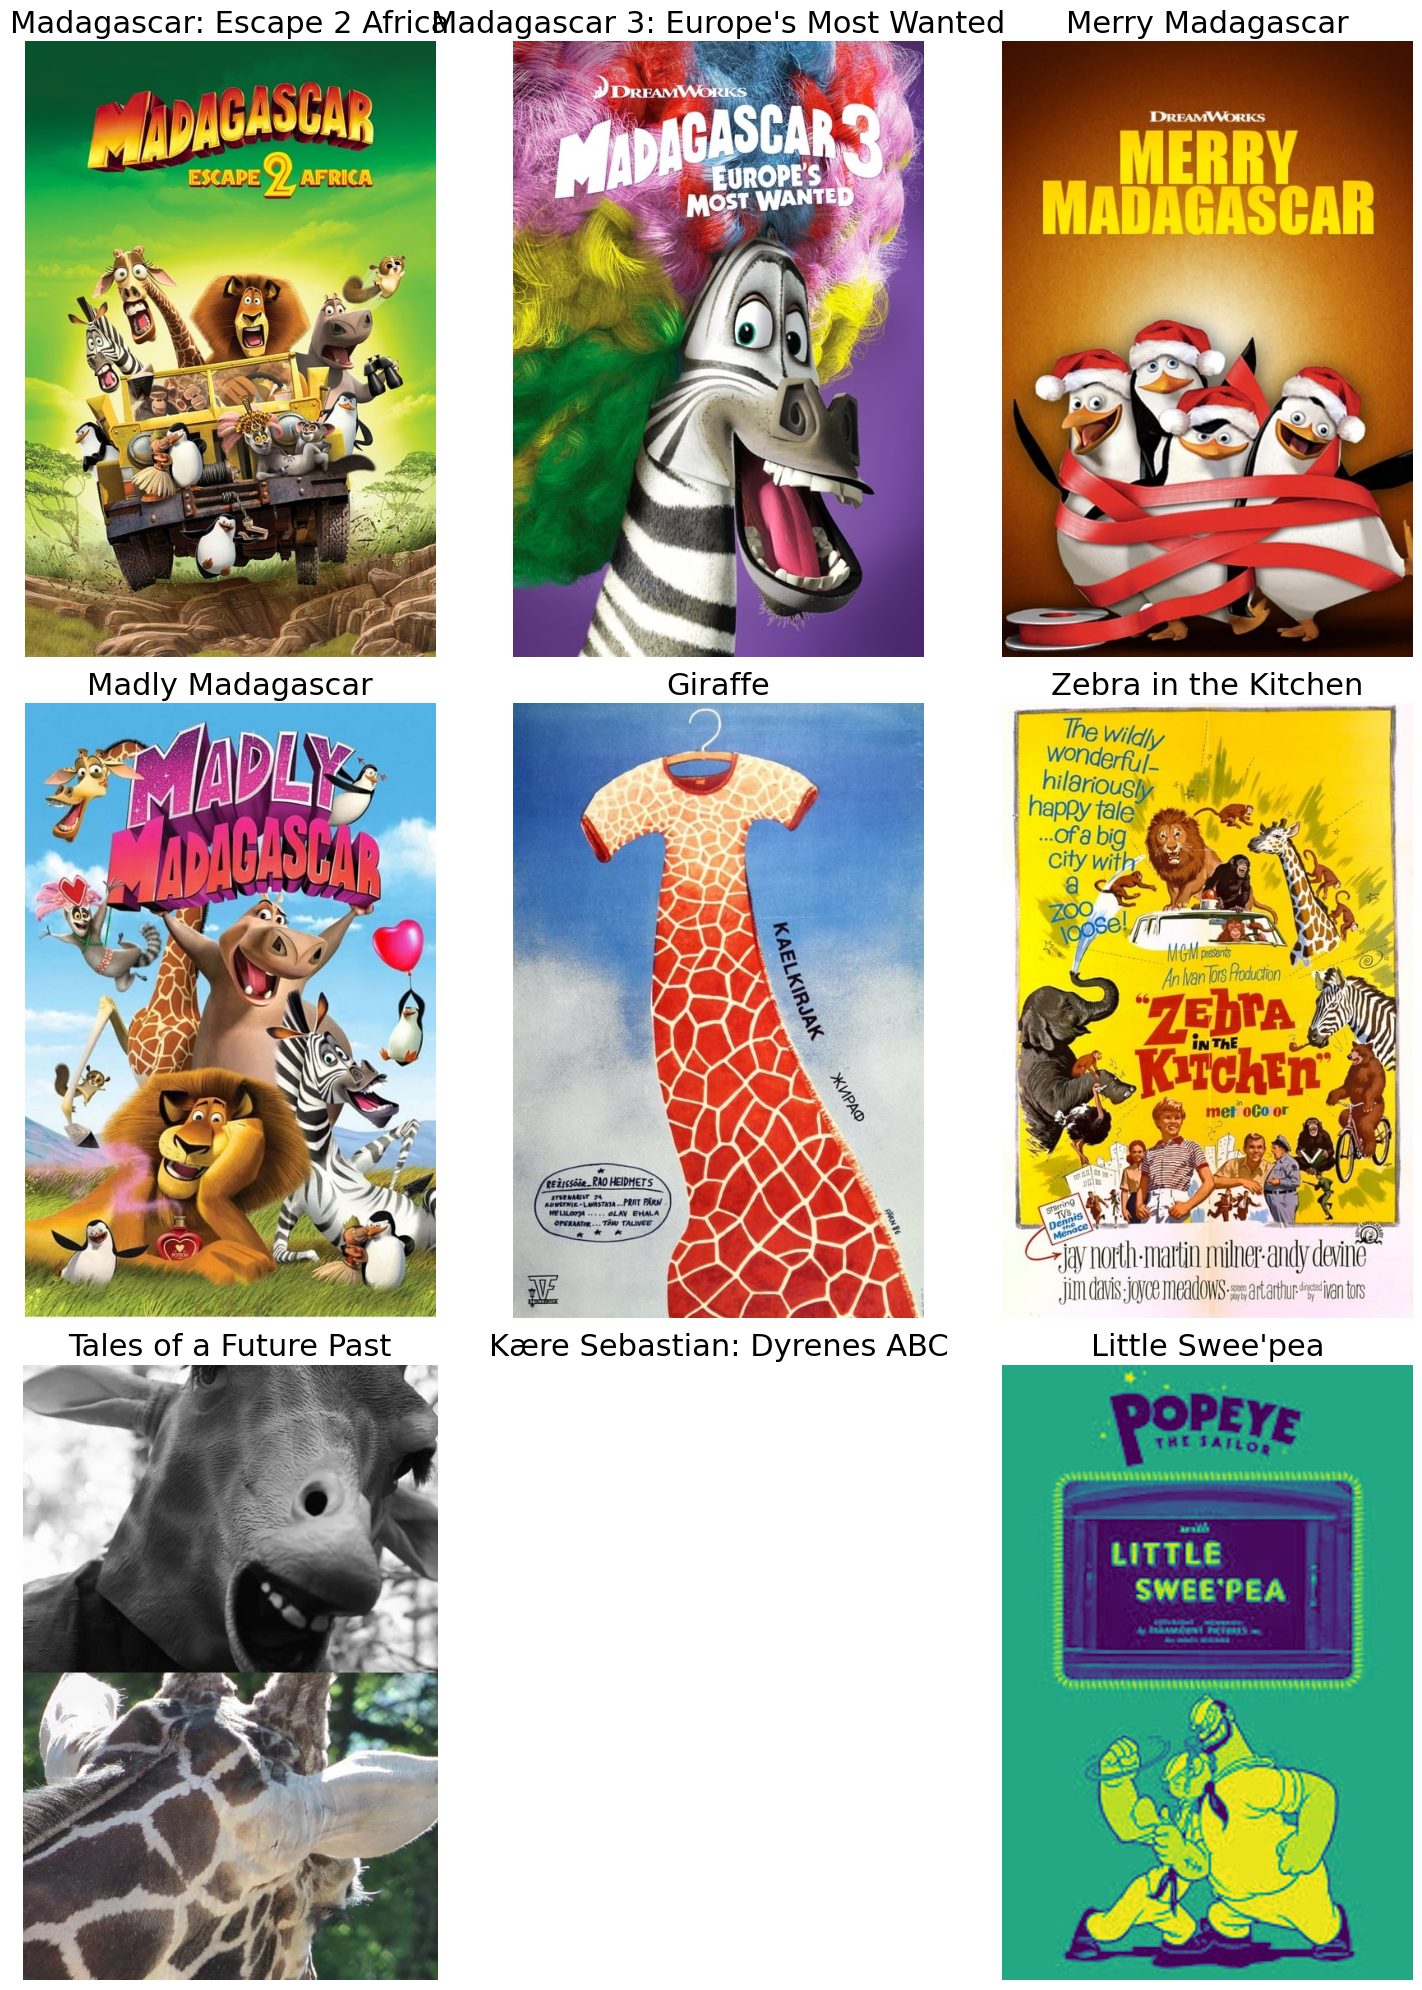

In [14]:
get_recommendations("Madagascar")